In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 4. k-Means Clustering

Load the dataset fashion mnist.csv located in hw4 data.zip. It is a fashion dataset released by Zalando Research. It is similar to the popular MNIST dataset for handwritten digit recognition. Each row in the file corresponds to an image. The first column in the file includes labels between 0-9 which correspond to the following product categories: 0 → T-shirt/top, 1 → Trouser, 2 → Pullover, 3 → Dress, 4 → Coat, 5 → Sandal, 6 → Shirt, 7 → Sneaker, 8 → Bag, 9 → Ankle boot.
The remaining columns store pixel values of 28 × 28-dimensional images in row-major format.

### 1. What is the frequency of products in each of the 10 categories in the loaded dataset?

In [2]:
fashion = pd.read_csv('fashion_mnist.csv', header = None)

In [3]:
frequency = {}
for i in range(len(fashion)):
    if fashion.loc[i][0] not in frequency.keys():
        frequency[fashion.loc[i][0]] = 1
    else:
        frequency[fashion.loc[i][0]] += 1
frequency 

{0: 7000,
 1: 7000,
 2: 7000,
 3: 7000,
 4: 7000,
 5: 7000,
 6: 7000,
 7: 7000,
 8: 7000,
 9: 7000}

### 2. Cluster the dataset using K-Means clustering with 20 clusters. What is the frequency of each cluster in the cluster assignment?

In [4]:
x = fashion.loc[:, 1:784]
y = fashion.loc[:, 0:0]
x = np.array(x)
y = np.array(y)

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [69]:
kmeans_cluster_assignments = kmeans.predict(x)
unique, counts = np.unique(kmeans_cluster_assignments, return_counts=True)
dict(zip(unique, counts))

{0: 3504,
 1: 3827,
 2: 4763,
 3: 1789,
 4: 3549,
 5: 4532,
 6: 3761,
 7: 3630,
 8: 3683,
 9: 1717,
 10: 2445,
 11: 2318,
 12: 4213,
 13: 3020,
 14: 5474,
 15: 3489,
 16: 2747,
 17: 1585,
 18: 4507,
 19: 5447}

### 3. For each of the 20 clusters, find 10 images that are closest to the cluster centroid. Plot the 10 images and identify the product category of the cluster.

In [72]:
centroid = kmeans.cluster_centers_

In [73]:
#Compute distance using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
distance = cosine_similarity(centroid, x)

Product category of Cluster 0 is 3
Product category of Cluster 1 is 5
Product category of Cluster 2 is 5
Product category of Cluster 3 is 5
Product category of Cluster 4 is 5
Product category of Cluster 5 is 8
Product category of Cluster 6 is 5
Product category of Cluster 7 is 8
Product category of Cluster 8 is 5
Product category of Cluster 9 is 0
Product category of Cluster 10 is 5
Product category of Cluster 11 is 8
Product category of Cluster 12 is 5
Product category of Cluster 13 is 5
Product category of Cluster 14 is 5
Product category of Cluster 15 is 5
Product category of Cluster 16 is 5
Product category of Cluster 17 is 0
Product category of Cluster 18 is 8
Product category of Cluster 19 is 5


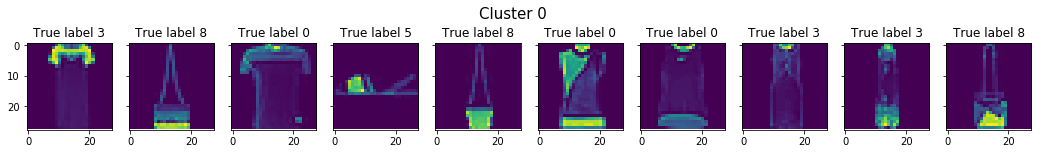

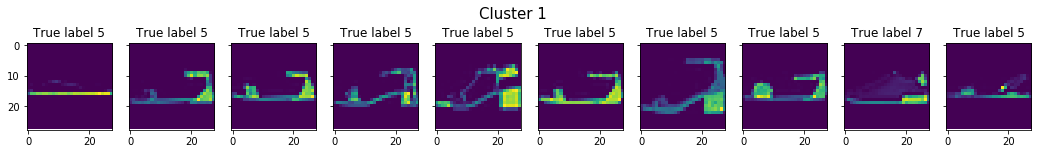

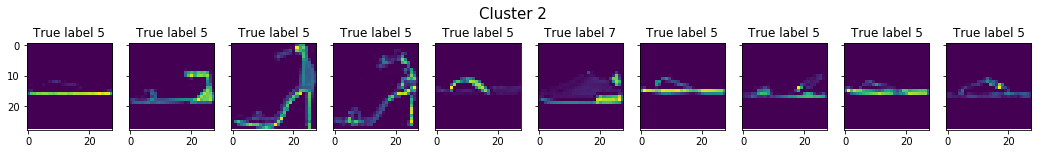

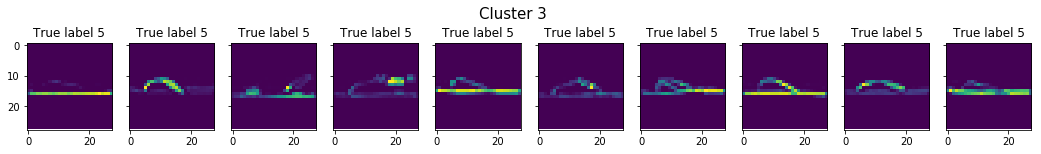

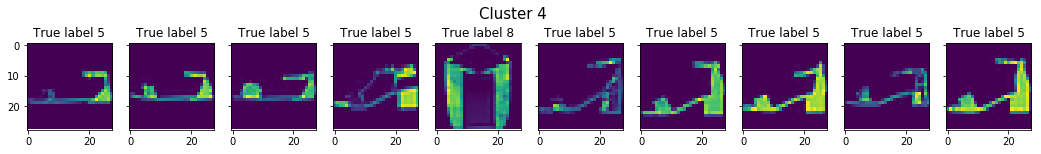

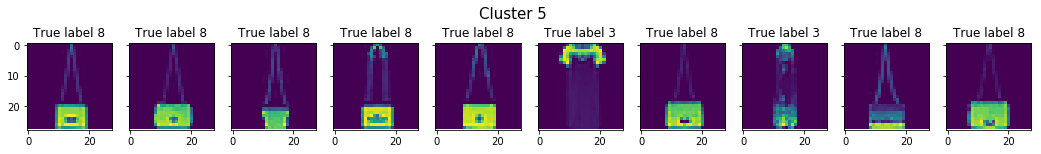

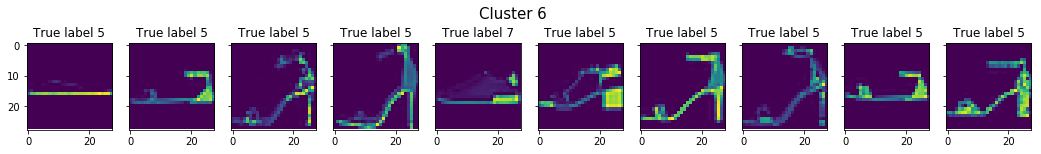

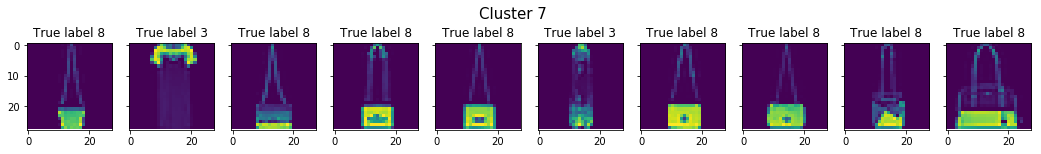

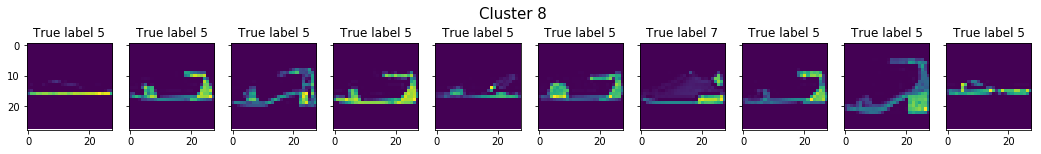

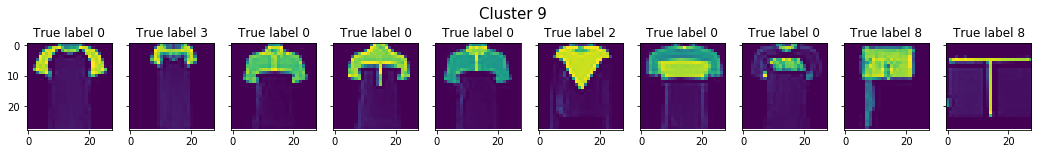

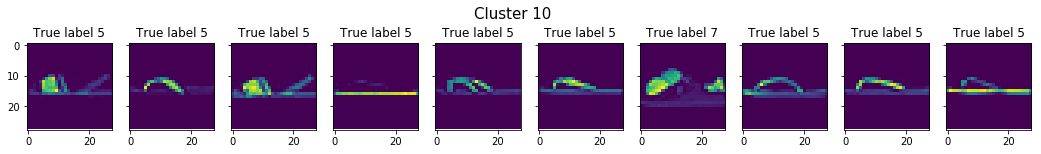

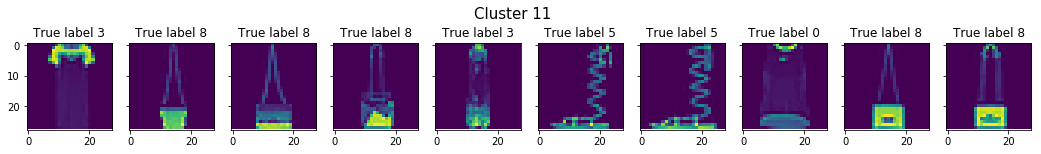

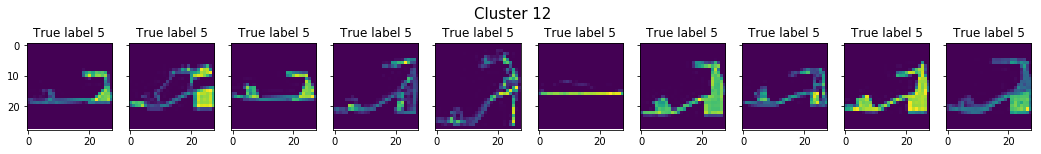

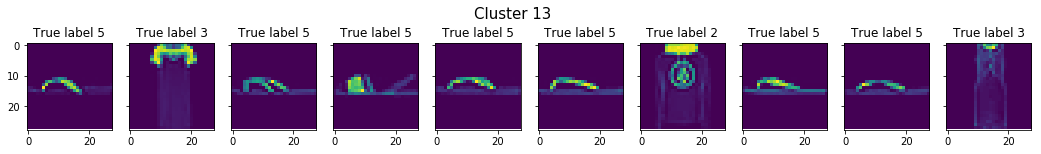

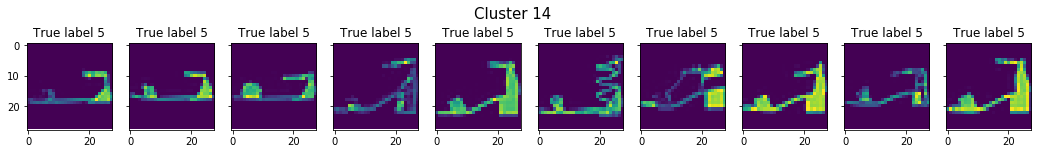

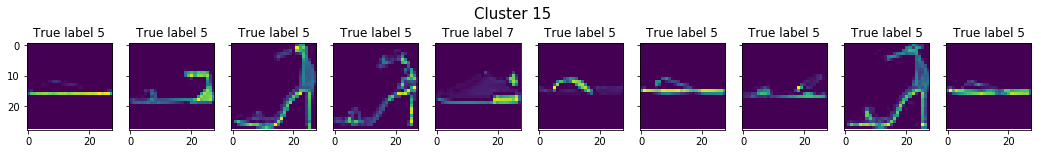

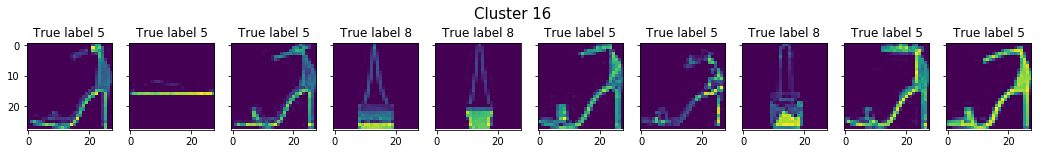

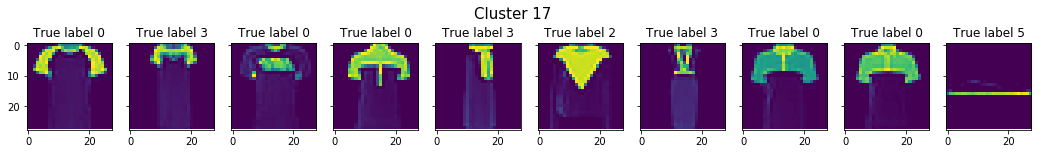

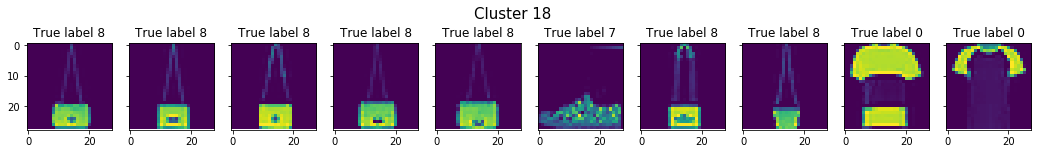

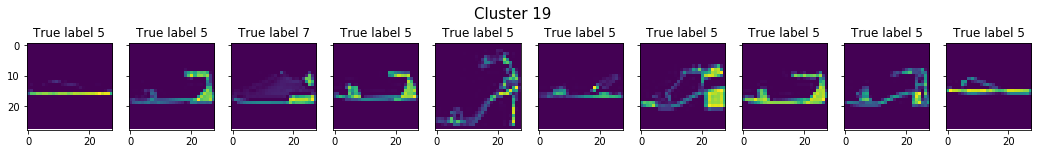

In [88]:
for i in range(len(distance)):
    fig, axs = plt.subplots(nrows=1, ncols = 10, sharex=True, sharey=True, figsize=(18, 2))
    fig.suptitle("Cluster {0}".format(i), fontsize=15)
    count = {}
    for j, idx in enumerate(np.argsort(distance[i])[0:10].tolist()):
        if y[idx][0] not in count.keys():
            count[y[idx][0]] = 1
        else:
            count[y[idx][0]] += 1
        axs[j].set_title("True label {0}".format(y[idx][0]))
        axs[j].imshow(x[idx].reshape(28,28))
    #Use the most frequent labels to indicate the product category of each cluster
    print("Product category of Cluster "+str(i)+" is "+ str(max(count.keys(), key=lambda k: count[k])))
    fig.subplots_adjust(top=0.73)

## 5. Spectral Clustering

In spectral clustering, the best that we can hope for in practice is a near block-diagonal affinity matrix. It can be shown in this case, that after projecting to the space spanned by the top k eigenvectors, points which belong to the same block are close to each other in a euclidean sense. We will not try to prove this, but using this intuition, you will implement one (of many) possible spectral clustering algorithms. This particular algorithm is described in On Spectral Clustering: Analysis and an algorithm Andrew Y. Ng, Michael I. Jordan, Yair Weiss (2001).

In [90]:
node = pd.read_csv('polblogs_nodes.csv')
edge = pd.read_csv('polblogs_edges.csv')

In [173]:
connected = {}
for i in range(len(edge)):
    if edge['node1'][i] not in connected.keys():
        connected[edge['node1'][i]] = [edge['node2'][i]]
    else:
        connected[edge['node1'][i]].append(edge['node2'][i])

### 1. Construct a d × d-dimensional affinity matrix A0 where d is the number of nodes in the blog network. The (i, j)th entry of A should be 1 if i and j are connected in the graph. Plot the matrix A0 in the grayscale format.

In [190]:
#Initialization of A with pre-specified shape (1490, 1490)
A0 = np.zeros((len(node), len(node)))
for i in connected.keys():
    for j in connected[i]:
        A0[i-1][j-1] = 1
        A0[j-1][i-1] = 1

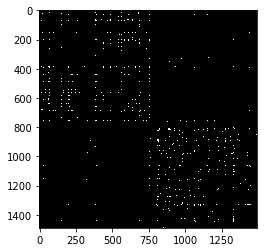

In [191]:
plt.imshow(A0, cmap = 'gray')
plt.show()

### 2. Remove any nodes which are connected to less than 5 neighbors. Plot the resulting affinity matrix A1 in the grayscale format.

In [199]:
rowsum = A0.sum(axis = 0).tolist()
flag = []
for i in range(len(rowsum)):
    if rowsum[i] < 5:
        flag.append(i)

In [207]:
A1 = np.delete(A0, tuple(flag), axis =0)
A1 = np.delete(A1, tuple(flag), axis =1)

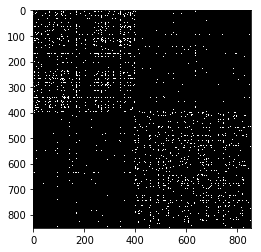

In [209]:
plt.imshow(A1, cmap = 'gray')
plt.show()

### 3. Normalize the rows and columns of A1 as indicated in the algorithm to get a normalized matrix N. Plot N in the grayscale format. If the plot is not clear, plot a binarized version of N in which all non-zeros are set to 1.

In [221]:
row = A1.sum(axis = 0)
col = A1.sum(axis = 1)
#Normalize the matrix A1
N = np.zeros((A1.shape))
import math
for i in range(len(N)):
    for j in range(len(N)):
        N[i][j] = A1[i][j]/math.sqrt(row[i]*col[j])

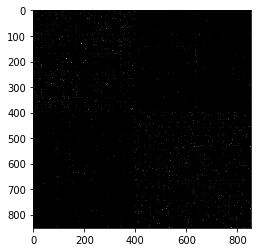

In [224]:
#The plot of original N matirx is not obvious
plt.imshow(N, cmap = 'gray')
plt.show()

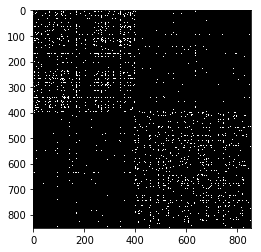

In [332]:
#Plot the binarized N matrix
plt.imshow(np.where(N > 0, 1, 0), cmap = 'gray')
plt.show()

### 4. Obtain a spectral embedding i.e. construct a matrix Y whose columns are the first 2 eigenvectors of N. Thus, Y is two-dimensional, and can be conveniently plotted. Normalize each row of Y such that it is of unit length. Cluster the dataset by running k-means with k = 2 on the set of spectrally embedded points, where each row of Y is a data point. Plot the confusion matrix between the ground truth political leaning of the blog (from the third column ‘value’ in the nodes data) and the cluster assignments obtained from k-means.

In [342]:
#eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(N)
#Sort the eigenvalues to identify the smallest eigenvalues and the corresponding eigenvectors
Y = eigenvectors[:, np.argsort(eigenvalues)[::-1][0:2]]
#Convert the eigenvector into unit length
from sklearn import preprocessing
Y = preprocessing.normalize(Y, norm='l2')

In [343]:
kmeans_spectral = KMeans(n_clusters=2)
kmeans_spectral.fit(Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [344]:
y_true = np.array(node['value'])
y_true = np.delete(y_true, tuple(flag), axis = 0)

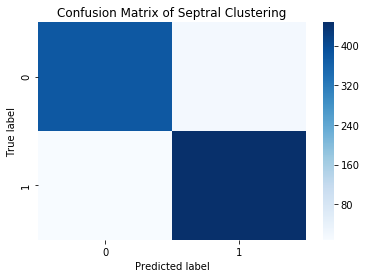

In [345]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, 1-kmeans_spectral.predict(Y))
sns.heatmap(cm, cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of Septral Clustering')
plt.show()

### 5. Create a scatterplot of the two dimensions of datapoints in Y . Color points by their assignment to one of the two clusters. Show connected nodes using a grey-colored line segment between them.

In [346]:
pred = 1-kmeans_spectral.predict(Y)

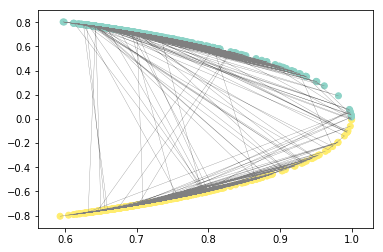

In [403]:
plt.scatter(Y[:,0],Y[:,1], c = pred, cmap = 'Set3')
plt.plot(Y[:,0], Y[:,1], c= 'grey', linewidth=0.3)
plt.show()

### 6. Create a scatterplot of the two dimensions of datapoints in Y . In this case, color points by their ground truth political leaning (0 or 1). Show connected nodes using a grey-colored line segment between them. Can you spot the nodes where the cluster assignment differs from the ground truth political leaning of the node’s blog?

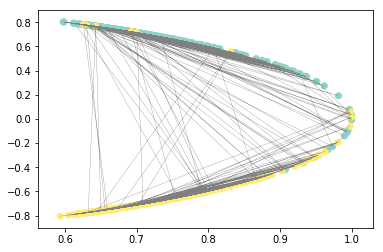

In [405]:
plt.scatter(Y[:,0],Y[:,1], c = y_true, cmap = 'Set3')
plt.plot(Y[:,0], Y[:,1], c= 'grey', linewidth=0.3)
plt.show()

From the plot above, we can see that some points in the upper left corner and the point of the ellipse are misclassified, judging from the different colors.

### 7. Identify which cluster contains mostly liberal blogs i.e. the “liberal” cluster. Similarly, the other cluster will mostly contain “conservative” blogs and will be called the “conservative” cluster.

In [418]:
#Identify political affiliation of Cluster 0
element0, freq0 = np.unique(y_true[pred == 0], return_counts=True)
print("Cluster 0")
print(dict(zip(element0, freq0)))
#Identify political affiliation of Cluster 1
element1, freq1 = np.unique(y_true[pred == 1], return_counts=True)
print("Cluster 1")
print(dict(zip(element1, freq1)))

Cluster 0
{0: 380, 1: 8}
Cluster 1
{0: 17, 1: 447}


Cluster 0 contains mostly liberal blogs with 380 liberal blogs and 8 conservative blogs.<br>
Cluster 1 contains mostly conservative blogs with 447 conservative blogs and 17 liberal blogs.<br>
Therefore, cluster 0 is the liberal cluster and cluster 1 is the conservative cluster.

### 8. Fit K-Means on the matrix Y for k = 2, 3, 4, ..., 50 and plot sum of squared distances of data to their closest cluster on the Y-axis versus k on the X-axis. This is known as the elbow plot for K-Means clustering. Please include the plot in your report.

In [421]:
cdist = []
for k in range(2,51):
    k_means = KMeans(n_clusters = k)
    k_means.fit(Y)
    cdist.append(k_means.inertia_)

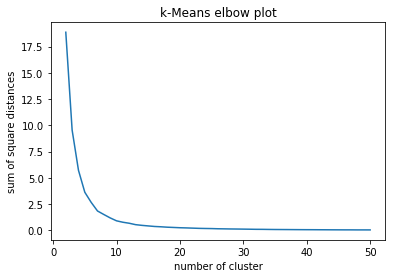

In [427]:
plt.plot(range(2,51), cdist)
plt.title("k-Means elbow plot")
plt.xlabel("number of cluster")
plt.ylabel("sum of square distances")
plt.show()

### 9. Can you pick a suitable k based on the elbow plot? Is your graph monotonically decreasing? Is this necessarily the case for all K-Means elbow plots?

The suitable k should be around 7 to 10 since the sum of square distance drops dramatically around the range. The graph is monotonically decreasing, which is always the case for the elbow graph since as the number of clusters increases, the distances of data points from its nearest cluster will reduce.

## 6. Applied: Relational Semi-Supervised Classification

In this question, we will implement the “Learning with Local and Global Consistency” semi-supervised learn- ing algorithm for the Crescent Moons dataset. Find the dataset crescent data.csv located in hw4 data.zip. This data contains the true “Class” (along with the corresponding “true label”) and two features. Only a few of the observations are actually labeled.

In [432]:
crescent = pd.read_csv("crescent_data.csv")
crescent.head()

,Class,X1,X2,true_label,observed_label
0,+,-4.142135,6.301895,1.0,0.0
1,+,-2.663537,8.002543,1.0,0.0
2,+,1.820477,1.601793,1.0,0.0
3,+,-2.633600,7.666188,1.0,0.0
4,+,-6.010648,3.691572,1.0,0.0


### 1. Visualize the dataset using a scatterplot to color by the unlabeled data and labeled data. Output this in a small/medium-size.


In [535]:
unobserved = crescent[crescent['observed_label'] == 0.0]
labeled = crescent[(crescent['observed_label'] == -1.0) | (crescent['observed_label'] == 1.0)]

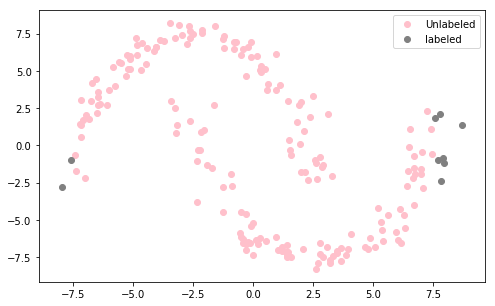

In [537]:
plt.figure(figsize = (8,5))
plt.scatter(unobserved['X1'], unobserved['X2'], c = 'pink', label = 'Unlabeled')
plt.scatter(labeled['X1'], labeled['X2'], c = 'grey', label = 'labeled')
plt.legend()
plt.show()

### 2. Visualize the performance of a kNN-classification, using just the available labeled points, where k = 2 and classify the unlabeled points. First, why does using k > 2 not make that much sense, based on the visualization?Second, output the kNN predicted classification, distinguishing the points by color.

#### 1. Ans:
Ans: Based on the visualization, using k > 2 is not reasonable because the data is clearly composed of two clusters with half moon per cluster.

In [555]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 2)
knn.fit(np.array(labeled[['X1', 'X2']]), np.array(labeled['observed_label']))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

#### 2. Ans:

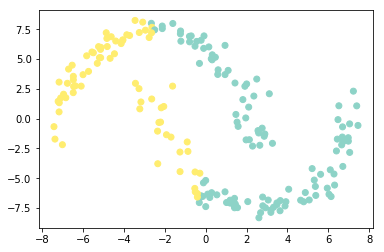

In [556]:
pred_knn = knn.predict(np.array(unobserved[['X1', 'X2']]))
plt.scatter(unobserved['X1'], unobserved['X2'], c = pred_knn, label = pred_knn, cmap= 'Set3')
plt.show()

### 3. Calculate the average Euclidean distance between all the 200 datapoints (a 200x200 matrix). Output this number.

In [571]:
from sklearn.metrics.pairwise import euclidean_distances
ecd_distance = euclidean_distances(np.array(crescent[['X1', 'X2']]))
print('Average Euclidean distance is', ecd_distance.mean())

Average Euclidean distance is 8.34606480915


### 4. Build the Gaussian radial basis distance affinity matrix, W, between all the 200 datapoints, as described in the algorithm. To choose the appropriate σ size for the distance, start with just the average Euclidean distance you calculated above as the value of σ. Next, be sure to correct all the diagonal entries to be zero. Output the first 5 rows and 5 columns of this dataset (after zeroing the diagonal).

In [607]:
W = np.exp(-ecd_distance ** 2 / ecd_distance.mean() ** 2)
np.fill_diagonal(W, 0)
print(W[0:5, 0:5])

[[ 0.          0.92968744  0.43712378  0.9423384   0.8624816 ]
 [ 0.92968744  0.          0.41610696  0.9983643   0.65204989]
 [ 0.43712378  0.41610696  0.          0.44362282  0.38941663]
 [ 0.9423384   0.9983643   0.44362282  0.          0.6767082 ]
 [ 0.8624816   0.65204989  0.38941663  0.6767082   0.        ]]


### 5. Calculate the normalization matrix, D. Each entry of the diagonal is the sum of the corresponding row of the affinity matrix. Then, use the affinity matrix and the normalization matrix to calculate $$ S = D ^ {(− 1 /2)}*W* D ^{(−1/2)}$$ Output the first 5 rows and 5 columns of this dataset.

In [606]:
D = np.zeros((W.shape))
for i in range(len(D)):
    D[i][i] = W.sum(axis = 0)[i]
print(D[0:5,0:5])

[[  84.22483161    0.            0.            0.            0.        ]
 [   0.           75.58824557    0.            0.            0.        ]
 [   0.            0.          103.97436759    0.            0.        ]
 [   0.            0.            0.           78.2705694     0.        ]
 [   0.            0.            0.            0.           83.12489814]]


In [615]:
D_inv = np.sqrt(np.linalg.inv(D))
S = np.dot(np.dot(D_inv, W), D_inv)
print(S[0:5,0:5])

[[ 0.          0.01165171  0.00467112  0.01160613  0.01030776]
 [ 0.01165171  0.          0.00469369  0.01297964  0.00822599]
 [ 0.00467112  0.00469369  0.          0.00491758  0.00418876]
 [ 0.01160613  0.01297964  0.00491758  0.          0.00838951]
 [ 0.01030776  0.00822599  0.00418876  0.00838951  0.        ]]


### 6. Calculate the final convergence classification predictions: $$F^∗ = (I − αS)^{(−1)}Y $$, where I is the diagonal identity matrix with the same dimensions as S, and Y is the same as before, the original labels. Output the error rates and classification plots for the following mixing parameters, α = 0.85 and α = 0.999, keeping the sigma = 0.03 times the average Euclidean distance.

In [631]:
Y = np.array(crescent['observed_label'])
I = np.identity(len(S))

In [650]:
sigma = 0.03*ecd_distance.mean()
W1 = np.exp(-ecd_distance ** 2 / sigma ** 2)
np.fill_diagonal(W1, 0)

In [651]:
D1 = np.zeros((W1.shape))
for i in range(len(D1)):
    D1[i][i] = W1.sum(axis = 0)[i]

In [653]:
D1_inv = np.sqrt(np.linalg.inv(D1))
S1 = np.dot(np.dot(D1_inv, W1), D1_inv)

#### α = 0.85

In [663]:
F1 = np.dot(np.linalg.inv(I-0.85*S1), Y)
F1[F1>0] = 1
F1[F1<0] = -1

In [664]:
error_rate = np.mean(F1 != crescent['true_label'])
print('The error rate of α = 0.85 is',error_rate)

The error rate of α = 0.85 is 0.03


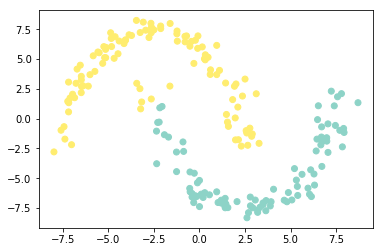

In [666]:
plt.scatter(crescent['X1'], crescent['X2'], c = F1, label = F1, cmap= 'Set3')
plt.show()

#### α = 0.999

In [671]:
F2 = np.dot(np.linalg.inv(I-0.999*S1), Y)
F2[F2>0] = 1
F2[F2<0] = -1

In [672]:
error_rate1 = np.mean(F2 != crescent['true_label'])
print('The error rate of α = 0.999 is',error_rate1)

The error rate of α = 0.999 is 0.005


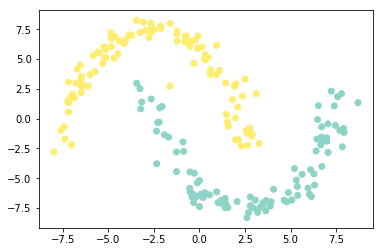

In [673]:
plt.scatter(crescent['X1'], crescent['X2'], c = F2, label = F2, cmap= 'Set3')
plt.show()